# Analise Exploratória e desenvolvimento de modelo naive Bayes para indetificar a qualidade de um vinho vermelho a partir de suas características físicas e químicas.

## importando bibliotecas

atualização das bibliotecas

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 25.3 MB 1.6 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
!pip install fitter

     |████████████████████████████████| 47 kB 4.1 MB/s 
  Created wheel for fitter: filename=fitter-1.4.0-py3-none-any.whl size=25025 sha256=ac59d02398175234803ebf6339f3845764495d669e87ea81d72300535020923e
  Stored in directory: /root/.cache/pip/wheels/e1/98/16/e5263962f94fbfaad79902aa94652516caccc1f1d51509e853
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=08ee3fa449ccfecd6b12d862c739f519eaa0df026c231d2469d7920882f57ff1
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built fitter easydev


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from fitter import Fitter, get_common_distributions, get_distributions

## Análise Inicial
Transformando csv em Dataframe

In [ ]:
df = pd.read_csv("winequality-red.csv",sep=';')

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Aqui checamos que o dataset possui 1599 instâncias e 12 atributos, os quais são todos do tipo float, menos a qualidade que é int.

In [ ]:
df.shape

(1599, 12)

In [ ]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

## Uma leve descrição da disposição estatística dos dados
Analisamos a quantidade, média, mínimo e máximo dos valores de cada atributo.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


### Consultando o maior volatile acidity

In [ ]:
df[df['fixed acidity'] >= 15.90000] 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5


## Checando se possuímos algum dado faltante

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Não possuímos nenhum dado Nulo

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

###Descubrimos a quantidade de valores distintos em cada atributo

In [ ]:
for var in df.columns:
    
    print(var, ' contém ', len(df[var].unique()), ' labels')


fixed acidity  contém  96  labels
volatile acidity  contém  143  labels
citric acid  contém  80  labels
residual sugar  contém  91  labels
chlorides  contém  153  labels
free sulfur dioxide  contém  60  labels
total sulfur dioxide  contém  144  labels
density  contém  436  labels
pH  contém  89  labels
sulphates  contém  96  labels
alcohol  contém  65  labels
quality  contém  6  labels


##  Distribuição dos atributos e da Classe (visualização dos dados)


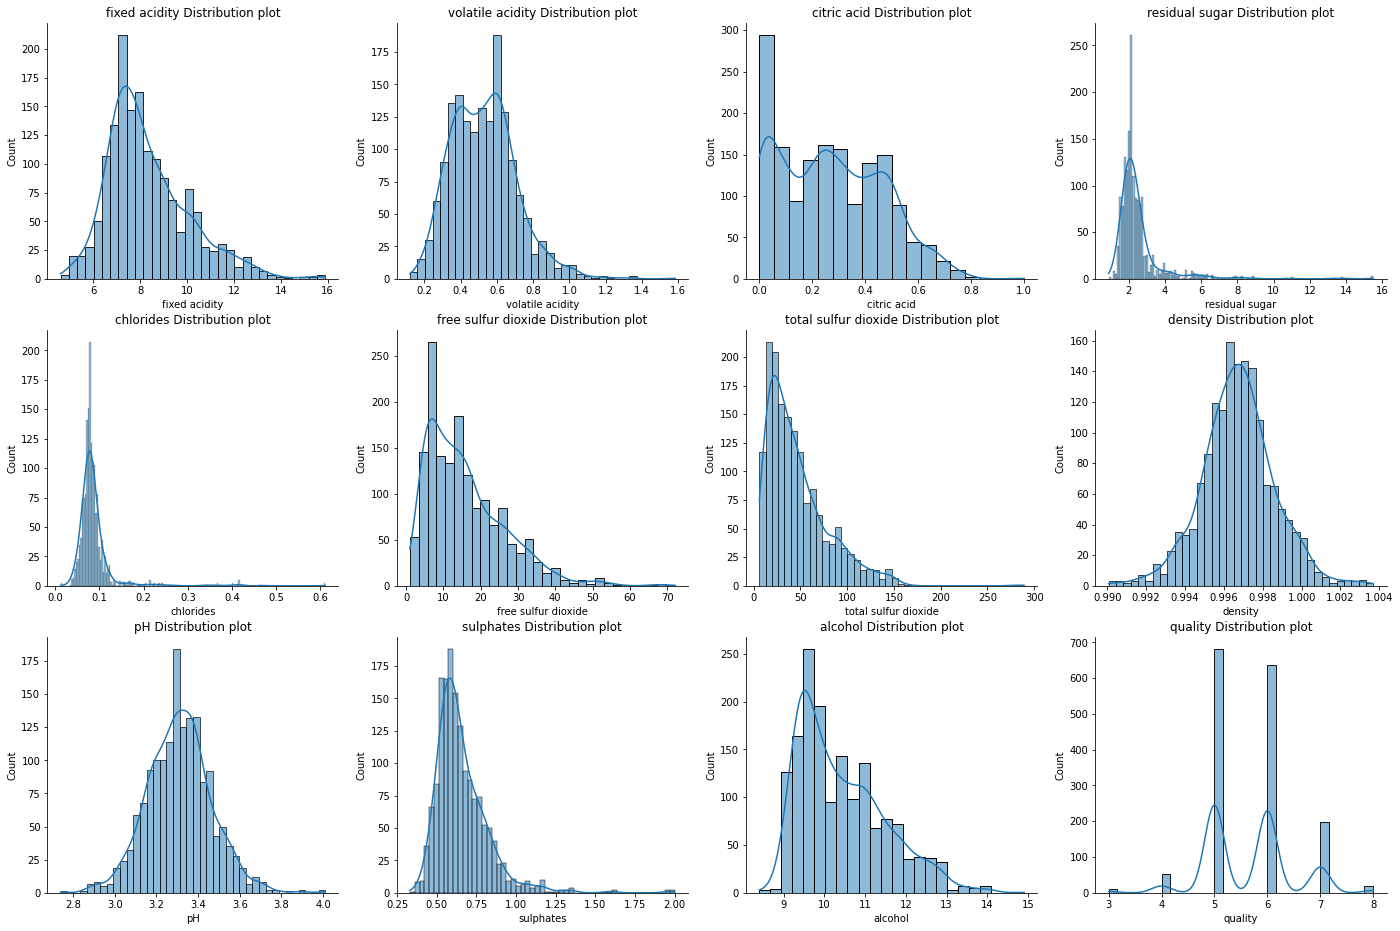

In [ ]:
i = 1
j = 1
plt.figure(figsize = (24,16))
for coluna in df.columns:
    
    plt.subplot(3,4,i)
    sns.histplot(df[coluna],kde=True,)
    plt.title(coluna+" Distribution plot")
    sns.despine()
  
    
    i = i+1

Gráfico que correlaciona os atributos: volatile acidity, alcohol, sulphates no gráfico e a cor diz a nota do atributo quality

In [ ]:
grafico = px.scatter_matrix(df, dimensions=['volatile acidity','alcohol', 'sulphates'], color = 'quality')
grafico.show()

Gráfico dinâmico que relaciona o pH com as frequências dos seus valores, logo após que acessa alguma das células, mostra as frequêcias dos valores do alcohol para o determinado pH selecionado. Selecionando algum dos valores do alcohol, mostra as frequências dos valores do citric acid do Ph e alcohol selecionado.
Obs: quanto maior a caixa, maior a frequência do valor.

In [ ]:
grafico2 =  px.treemap(df, path =['pH', 'alcohol', 'citric acid'])
grafico2.show()

# Mudança no dataset:
## Pudemos perceber pela distribuição, que os valores 5 e 6 são extremamente maiores que os outros, dessa forma optamos por excluir todas as outras linhas que são diferentes de 5 e 6, pois elas são outliers que só iriam atrapalhar o desenvolvimento do modelo



In [ ]:
cont5 = 0
cont6 = 0
for linha in df['quality']:
    if linha == 5:
        cont5= cont5+ 1;
    if linha == 6:
        cont6 = cont6 + 1
print(cont5)
print(cont6)
print(cont5+cont6)
df.shape
print((cont5+cont6)/1599)

681
638
1319
0.8248905565978737


## Fazendo a contabilidade, como imaginamos, 82% das linha são compostas de qualidade 5 e 6

Colocando todos os index's da tabela que possuem os outliers(quality ser diferente de 5 ou 6) em um vetor nomeado de 'deletar'

In [ ]:
deletar = []
for linha in range(0,len(df['quality'])):
    if df['quality'][linha] != 5 and df['quality'][linha] != 6 :
        deletar.append(linha)

Deleta todas as linhas com os índices do vetor deletar e logo depois printamos a quantidade de linhas e colunas da tabela processada

In [ ]:
df = df.drop(deletar)

In [ ]:
df.shape

(1319, 12)

###Nova visualização dos dados após a extração dos outliers para melhor visualização.

In [ ]:
grafico = px.scatter_matrix(df, dimensions=['volatile acidity','alcohol', 'sulphates'], color = 'quality')
grafico.show()

## Plotamos o mapa de calor das correlações entre os atributos e entre a classe

### Podemos perceber que os sulfatos e a quantidade de álcool são os valores com maior correlação direta
### e a volatilidade do ácido possui a maior correlação inversa

In [ ]:
indices = df.columns

In [ ]:
prov = df.copy()
cluster = prov[indices]

In [ ]:
cluster = cluster.corr(method = 'spearman')

In [ ]:
mask = np.zeros_like(cluster, dtype = np.bool)
mask[np.triu_indices_from(mask)]=True

In [ ]:
cmap = sns.diverging_palette(220,10,as_cmap=True)

Text(0.5, 0.98, 'Mapa de calor demonstrando correlação entre as variáveis')

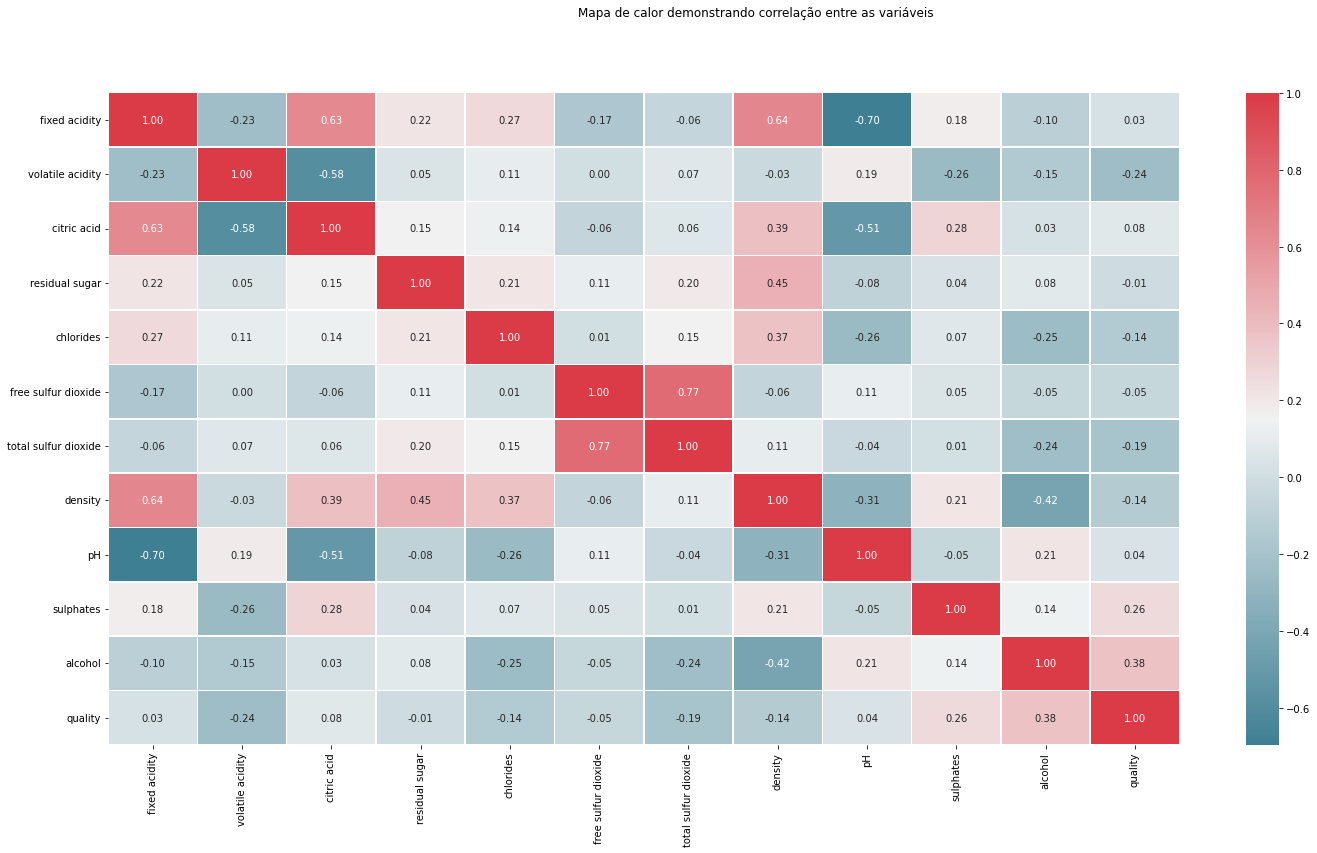

In [ ]:
fig,ax= plt.subplots(figsize = (24,12))
sns.heatmap(cluster,annot=True,linewidth = 0.5,ax = ax,fmt='.2f',cmap=cmap)
fig.suptitle("Mapa de calor demonstrando correlação entre as variáveis")

# Aplicação do modelo

In [ ]:
X = df.drop(['quality'], axis=1)

y = df['quality']

### Sepando os as linhas de treinamento e de testes com seus respectivos x's (previsores) e y's (classe)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
X_train.shape, X_test.shape
cols = X_train.columns

### Apenas utilizamos o rescurso da biblioteca pickle para guardamos as variáves a cima em arquivao e logo após resgatamos

In [ ]:
import pickle
with open('wine_test.pkl', mode = 'wb') as f:
  pickle.dump([X_train, y_train, X_test, y_test], f)

In [ ]:
import pickle
with open('wine_test.pkl', 'rb') as f:
  X_train, y_train, X_test, y_test = pickle.load(f)

## Normalizando os dados

Normalizamos todos os dados numpéricos, a fim de que o algorítmo não dê preferência a valores maiores (com distinções bastante relevante). O cálculo é feito da seguinte forma. x = ( x - media(x) ) / desvio_padrão(x)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test);
X_train

array([[-0.07759126,  1.45070091, -0.15944958, ...,  0.38523844,
        -0.52689037,  1.10287537],
       [ 0.51912536, -0.55194377,  0.50013482, ...,  0.4503334 ,
        -0.17155823, -0.76602176],
       [-0.67430788,  0.35834926, -1.36868764, ...,  0.58052332,
        -0.23078026,  0.68756489],
       ...,
       [-1.33069616,  0.23697686, -0.32434568, ...,  1.75223264,
         0.12455188,  2.34880679],
       [-0.37594957,  1.45070091, -1.42365301, ..., -0.00533134,
        -0.17155823,  0.47990966],
       [ 0.28043871,  1.45070091,  1.37958068, ..., -2.02327517,
         3.08565298, -1.07750461]])

## Treinando o modelo Gaussian
Fazemos o treinamento do algorítmo Naive Bayes nos dados de treinamento. O procedimento do algorítmo é criar uma tabela de relação da classe com os preditores.

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB();


# fit the model
gnb.fit(X_train, y_train);

Fazemos a previsão depois de treinar o algorítmo

In [ ]:
y_pred = gnb.predict(X_test)

Fazemos a acurácia para ver o rendimento do algorítmo com os casos testes

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7061


Fazemos a previsão e a acurácia para ver o rendimento do algorítmo com os casos de treinamento, para compararmos o do treino com teste a fim de vermos se ocorreu overfitting

In [ ]:
y_pred_train = gnb.predict(X_train);

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.6977


### Plotamos uma matriz de Confusão para visualizarmos quais 'quality' foram classificados corretamente

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred, y_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[113  46]
 [ 51 120]]

True Positives(TP) =  113

True Negatives(TN) =  120

False Positives(FP) =  46

False Negatives(FN) =  51


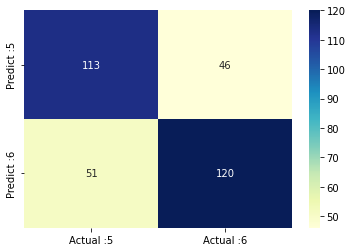

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual :5', 'Actual :6'], 
                                 index=['Predict :5', 'Predict :6'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu');

In [ ]:
cont = 0
for i in y_pred:
  if i == 6:
    cont = cont +1
print(cont)

171
